# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [158]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [159]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [160]:
df.shape

(400, 5)

### View info of the dataset

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [162]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [163]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [164]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [165]:
def gen(x):
    if x=='Male':
        return 0
    if x=='Female':
        return 1

In [166]:
df['Gender']=df['Gender'].apply(gen)

In [167]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [168]:
df.shape

(400, 5)

#### Drop user ID column

In [169]:
df.drop(columns=['User ID'],inplace=True)

In [170]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [171]:
df.shape

(400, 4)

## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

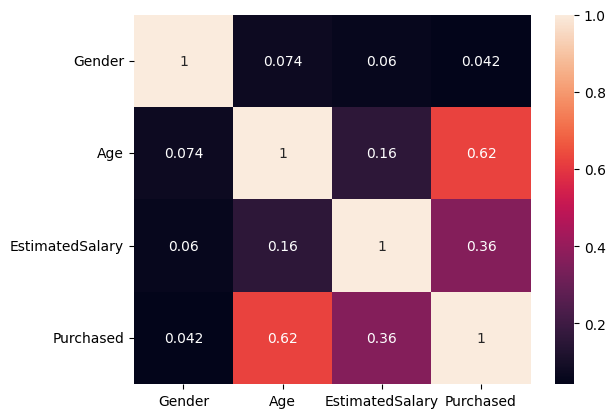

In [172]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

### Plot a countplot of gender with respect to purchased

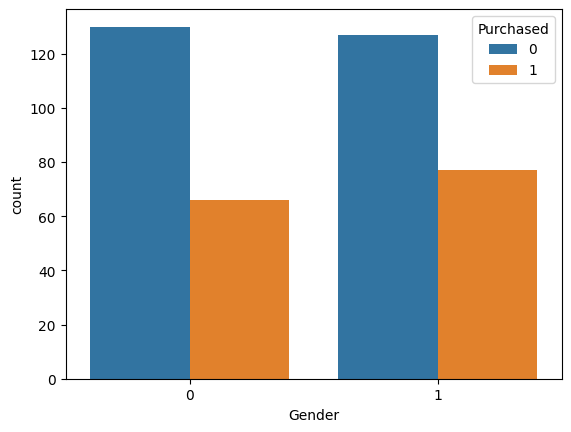

In [173]:
sns.countplot(data=df,x='Gender',hue='Purchased')
plt.show()

### Plot a displot of Age

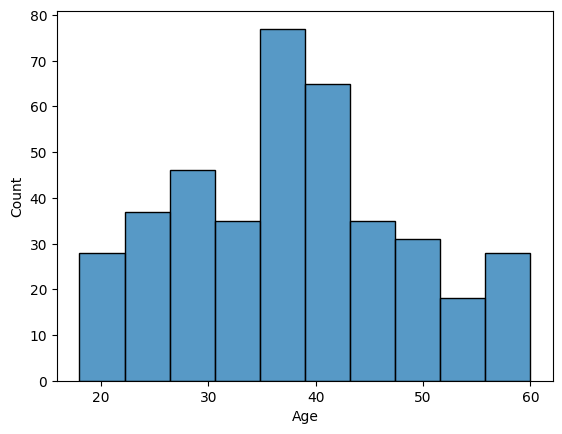

In [174]:
sns.histplot(data=df,x='Age')
plt.show()

### Plot pairplot of the dataset

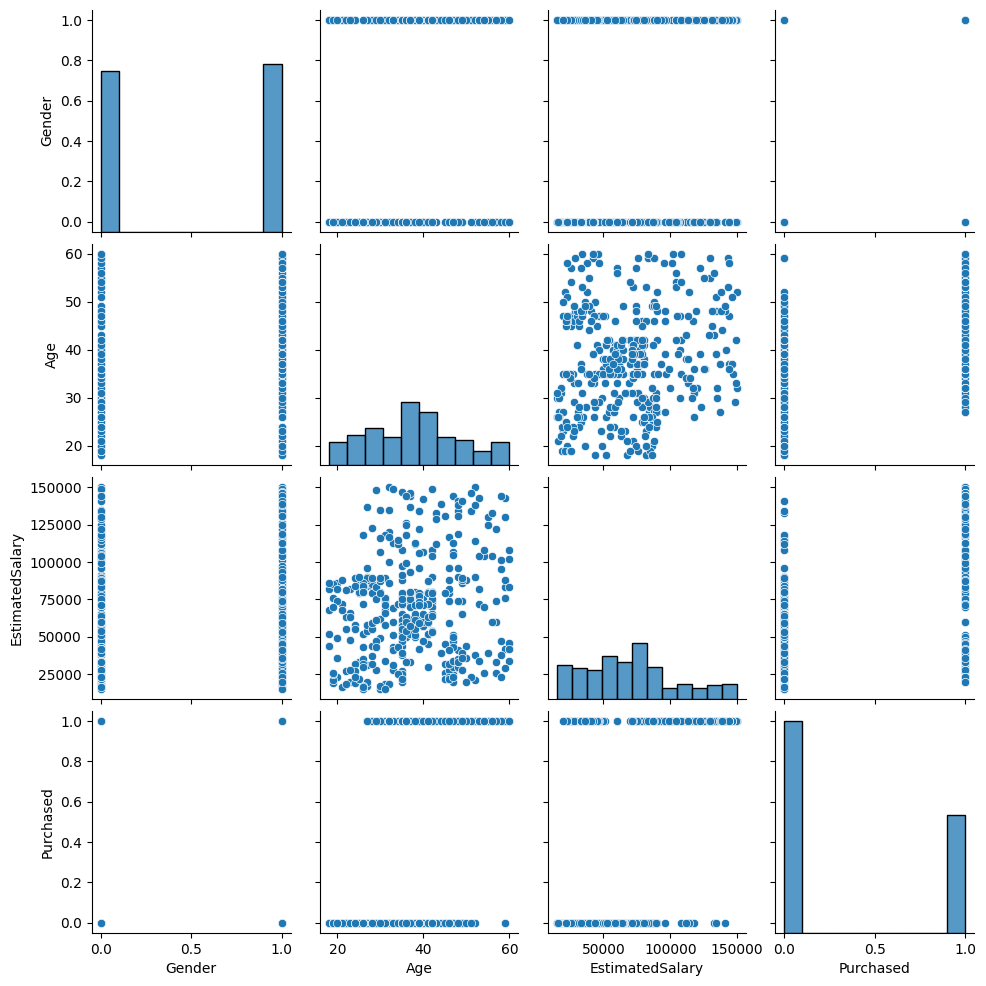

In [175]:
sns.pairplot(data=df)
plt.show()

In [176]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## Data Preprocessing

### Split the dataset into input and target variables

In [177]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

### Scale the data using StandardScaler

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler=StandardScaler()

In [180]:

xcolumns=x.columns

In [181]:
x=scaler.fit_transform(x)

In [182]:
x=pd.DataFrame(data=x,columns=xcolumns)

In [183]:
x.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [184]:
#X.head()

### Split the dataset into training and testing set

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

### Check shape of X_train and X_test

In [187]:
x_train.shape

(300, 3)

In [188]:
x_test.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [189]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [190]:
model1=LogisticRegression()

In [191]:
model1.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [192]:
model1.score(x_train,y_train)

0.85

In [193]:
y_pred_LR=model1.predict(x_test)

In [194]:
print(f'Accuracy score of our prediction is: {metrics.accuracy_score(y_test,y_pred_LR)}')

Accuracy score of our prediction is: 0.87


In [195]:
print(f'Confusion matrix is :\n{metrics.confusion_matrix(y_test,y_pred_LR)}')
print(f'Classification report\n{metrics.classification_report(y_test,y_pred_LR)}')



Confusion matrix is :
[[62  3]
 [10 25]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100



In [196]:
print(f'Mean ofCross Validation score is\n{cross_val_score(model1,x,y).mean()}')

Mean ofCross Validation score is
0.82


### Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
model2=RandomForestClassifier(n_estimators=20)

In [199]:
model2.fit(x_train,y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [200]:
model2.score(x_train,y_train)

0.9966666666666667

In [201]:
y_pred_RF=model2.predict(x_test)

In [202]:
print(f'Accuracy score of our prediction is: {metrics.accuracy_score(y_test,y_pred_RF)}')

Accuracy score of our prediction is: 0.89


In [203]:
print(f'Confusion matrix is :\n{metrics.confusion_matrix(y_test,y_pred_RF)}')
print(f'Classification report\n{metrics.classification_report(y_test,y_pred_RF)}')



Confusion matrix is :
[[62  3]
 [ 8 27]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        65
           1       0.90      0.77      0.83        35

    accuracy                           0.89       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100



In [204]:
print(f'Mean ofCross Validation score is\n{cross_val_score(model2,x,y)}')

Mean ofCross Validation score is
[0.8    0.95   0.8875 0.8375 0.8625]


### Support Vector Machine

In [205]:
from sklearn.svm import SVC

In [206]:
model3=SVC(probability=True)

In [207]:
model3.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [208]:
import pickle
pickle_out = open("Customer_Behaviour.pkl","wb")
pickle.dump(model3,pickle_out)
pickle_out.close()

In [209]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

In [210]:
model3.score(x_train,y_train)

0.9033333333333333

In [211]:
y_pred_SVC=model1.predict(x_test)

In [212]:
print(f'Accuracy score of our prediction is: {metrics.accuracy_score(y_test,y_pred_SVC)}')

Accuracy score of our prediction is: 0.87


In [213]:
print(f'Confusion matrix is :\n{metrics.confusion_matrix(y_test,y_pred_SVC)}')
print(f'Classification report\n{metrics.classification_report(y_test,y_pred_SVC)}')



Confusion matrix is :
[[62  3]
 [10 25]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100



In [214]:
print(f'Mean ofCross Validation score is\n{cross_val_score(model3,x,y)}')

Mean ofCross Validation score is
[0.9125 0.9375 0.9125 0.8125 0.925 ]


### Assign cross val scores of all models into a dataframe

In [215]:
score_df=pd.DataFrame({'Models':['Losgestic Regression','Random Forest','Support Vector'],'Score':[cross_val_score(model1,x,y).mean(),cross_val_score(model2,x,y).mean(),cross_val_score(model3,x,y).mean()]})

In [216]:
score_df

,Models,Score
0,Losgestic Regression,0.82
1,Random Forest,0.84
2,Support Vector,0.90


***

## Deploy the model with highest score using straemlit

In [217]:
%%writefile customer_behaviour_app.py

import numpy as np
import streamlit as st
import pickle

#load model

def load_model():
    try:
        with open("Customer_Behaviour.pkl",'rb') as file:
            model = pickle.load(file)

        scaler=None
        try:
            with open("scaler.pkl",'rb') as file:
                scaler = pickle.load(file)
        except:
            st.warning("Scaler not found or invalid")

        return model,scaler
    except FileNotFoundError as e:
        return f"Model files is not found: {e}"

model,scaler =load_model()

# convert gender to numerical
def genderinput(gender_input):
    if gender_input=="Male":
        return 0
    else:
        return 1


# convert predictions to text

def resultout(result):
    if result==1:
        return 'Yes'
    else:
        return 'No'

#function for prediction

def customer_satisfaction_prediction(gender_input,age_input,salary_input):
    try:
        gender_value = genderinput(gender_input)
        age_value = float(age_input)
        salary_value = float(salary_input)

        input_data = np.array([[gender_value,age_value,salary_vale]])

        if scaler is None or not hasattr(scaler,'transform'):
            return "Error Scaler not available or invalid"

        scaled_data = scaler.transform(input_data)

        prediction = model.predict(scaled_data)
        probabilities=model.predict_proba(scaled_data)
        predicted_purchase= int(prediction[0])

        confidence = probabilities[0][predicted_purchase]

        return predicted_purchase, confidence
    except Exception as e:
        return f"Prediction Error: {e}", None

#main

def main():
    st.title("Customer Behaviour prediction App")
    gender_input = st.selectbox("Select Gender",['Male','Female'])
    age_input = st.number_input("Enter Age",min_value=18,max_value=100,value=30)
    salary_input = st.number_input("Enter Estimated Salary",min_value=0,value=5000,step=500)

    if st.button("Predict Customer Purchase"):
        if model is None:
            st.error("Model not loaded property. Please check the file")

        result, confidence = customer_satisfaction_prediction(gender_input, age_input, salary_input)

        if isinstance(result,str) and (result.startswith("Error")or result.startswith("Prediction Error")):
            st.error(result)
        else:
            result_output=resultoutput(result)
            st.success(f"Will Customer Purchase? : {result_output}")
            if confidence is not None:
                st.info(f'Confidence: {confidence:.2%}')

if __name__=="__main__":
    main()
        

Overwriting customer_behaviour_app.py


***

# <span style = "color:green;font-size:40px"> Great Job! </span>